# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [3]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [4]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


The dataset is loaded via a csv and a default index, i.e, we are using python's inherent indexing and not specifying any data column as index

In [8]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Appears that there are a total of 400 rows, but a few of the columns have lesser than 400 count, suggesting the presence of NULL or nan values

In [9]:
df_raw

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [6]:
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset?


In [ ]:
df_raw.count()

Answer:Appears that there are a total of 400 rows, but a few of the columns have lesser than 400 count, suggesting the presence of NULL or nan values.


check the number of null values and where are they present, for example we are doing it on column gre and creating a sub-set of a data frame where gre is null

In [14]:
df_na_data_gre = df_raw[df_raw.gre.isnull()]


,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


#### Question 2. Create a summary table.

In [15]:
# function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:The values for GRE are have a wider range as compared to GPA as is evident from the min,max and the %age columns and hence are farther spread from the mean ,leading to a larger STD .

#### Question 4. Drop data points with missing data.


In [29]:
df_raw.dropna(inplace=True)
#running this function with the default parameter of any,and a value True for the inplace parameter.
#This would ensure that the rows which have any null values in the column get dropped and the changes reflect in the original dataframe

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

In [32]:
df_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [33]:
df_raw.dropna().count()


admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA.

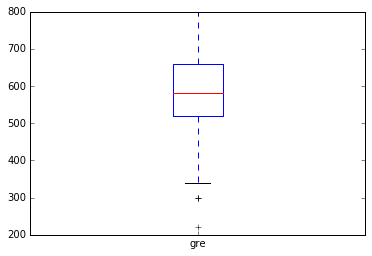

In [38]:
# boxplot 1
df_raw[['gre']].plot(kind='box')


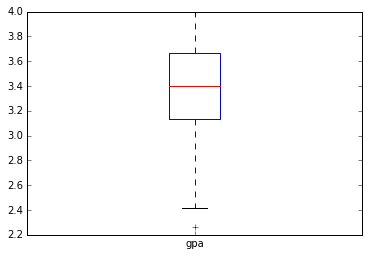

In [47]:
# boxplot 2
df_raw[['gpa']].plot(kind='box')


In [61]:
IQR_gre = df_raw[['gre']].quantile(.75)-df_raw[['gre']].quantile(.5)
IQR_gpa = df_raw[['gpa']].quantile(.75)-df_raw[['gpa']].quantile(.5)

print IQR_gre
print IQR_gpa


gre    80.0
dtype: float64
gpa    0.27
dtype: float64


#### Question 7. What do this plots show?

Answer:
IQR_gre = df_raw[['gre']].quantile(.75)-df_raw[['gre']].quantile(.5)
IQR_gpa = df_raw[['gpa']].quantile(.75)-df_raw[['gpa']].quantile(.5)

GRE has an IQR of 80 and gpa has IQR of .27. There are no outliers in these 2 distribution that are outside the normal range Q1-1.5IQR< x <Q3+1.5 IQR

In [52]:
df_raw[['gre']].describe()


,gre
count,397.000000
mean,587.858942
std,115.717787
min,220.000000
25%,520.000000
50%,580.000000
75%,660.000000
max,800.000000


#### Question 8. Describe each distribution.

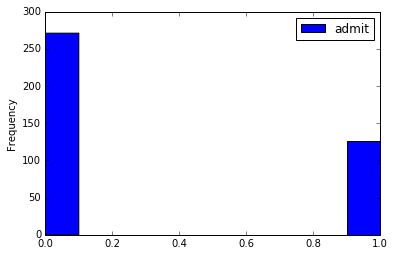

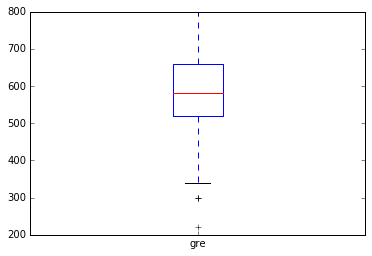

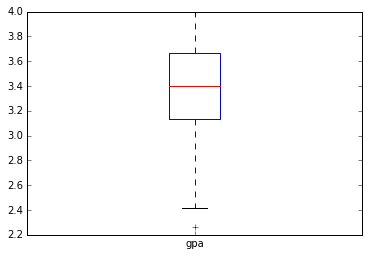

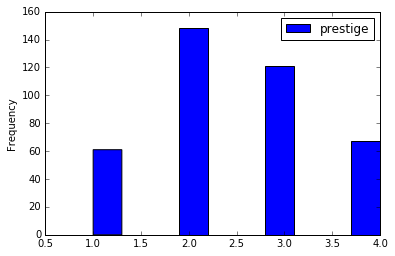

In [66]:
# plot the distribution of each variable
df_raw[['admit']].plot(kind = 'Hist')
df_raw[['gre']].plot(kind = 'box')
df_raw[['gpa']].plot(kind = 'box')
df_raw[['prestige']].plot(kind = 'Hist')




#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer:No, None of the predictors have a uniform distribution around the mean and would not result in a normal distibution.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer:GRE is approx ~10**2 greater in magnitude than gpa, in order to have a normal dist. we may want to bring them to the same scale

#### Question 11. Which of our variables are potentially colinear?

In [ ]:
# create a correlation matrix for the data
As evident by the plot below there doesnt seem to be any values that are linearly related

In [ ]:
Plot between GPA and Prestige

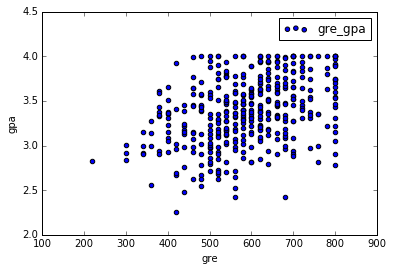

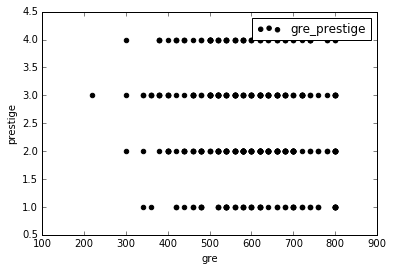

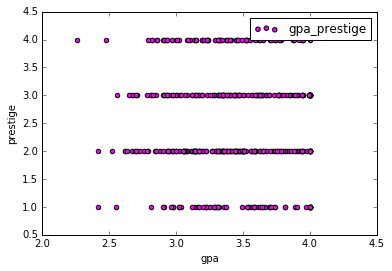

In [119]:
#df_raw.plot.scatter(0,1)
df_raw.plot(kind='scatter',x='gre',y='gpa',color='blue',label='gre_gpa')
df_raw.plot(kind='scatter',x='gre',y='prestige',color='black',label='gre_prestige')
df_raw.plot(kind='scatter',x='gpa',y='prestige',color='magenta',label='gpa_prestige')




#### Question 12. What did you find?

There seems to be a positive corelation between gre and gpa

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Assign constant values to other variables like gre,gpa and try to find a analyze the relationship between prestige and admit

#### Question 14. What is your hypothesis?

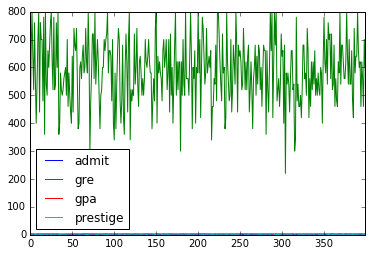

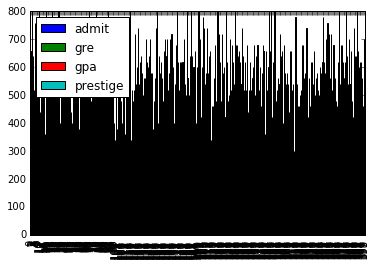

In [125]:
df_raw.plot()

df_raw.plot(kind='bar')

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

#### 2. Bonus: Log transform the skewed data.

#### 3. Advanced: Impute missing data.

In [142]:
df_new

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [153]:
df_new = df.apply(lambda if x isnull() x:x=0, else x:x=x/2 axis=1)

SyntaxError: invalid syntax (<ipython-input-153-a13a387c156d>, line 1)

In [152]:
df_new

,admit,gre,gpa,prestige
0,0.0,190.0,1.805,1.5
1,0.5,330.0,1.835,1.5
2,0.5,400.0,2.000,0.5
3,0.5,320.0,1.595,2.0
4,0.0,260.0,1.465,2.0
5,0.5,380.0,1.500,1.0
6,0.5,280.0,1.490,0.5
7,0.0,200.0,1.540,1.0
8,0.5,270.0,1.695,1.5
9,0.0,350.0,1.960,1.0


In [170]:
def twice(x):
    x*2
f = lambda x:x.twice(x)
df.applymap(f)

AttributeError: ("'numpy.int64' object has no attribute 'twice'", u'occurred at index admit')

AttributeError: ("'Series' object has no attribute 'twice'", u'occurred at index 0')

In [137]:
df.apply(isnull())

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False
